In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

days = 40
window = 60

In [0]:
dataset_train = pd.read_csv("Tejarat.Bank.csv",delimiter=',',encoding='utf-8')
dataset_train.drop(dataset_train.columns[[0, 9]], axis=1, inplace=True)
training_set = dataset_train.iloc[:-days, 1:2].values

In [114]:
dataset_train.head()

,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<OPEN>,<LAST>
0,20200127,509.0,535.0,501.0,526.0,605003268509,1150263553,29861,510.0,535.0
1,20200126,506.0,517.0,504.0,510.0,433305672584,849554308,24742,504.0,507.0
2,20200125,510.0,511.0,500.0,504.0,372199946702,738249903,23493,507.0,502.0
3,20200122,504.0,518.0,500.0,507.0,263854397040,520652067,15112,503.0,506.0
4,20200121,518.0,518.0,497.0,503.0,446317626772,887277547,24078,515.0,502.0


In [0]:
# print(len(training_set))
# print(len(dataset_train))

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(window, len(training_set)):
    X_train.append(training_set_scaled[i-window:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mae'])

In [121]:
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
2064/2064 [==============================] - 21s 10ms/step - loss: 0.0130 - mean_absolute_error: 0.0686
Epoch 2/30
2064/2064 [==============================] - 14s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0411
Epoch 3/30
2064/2064 [==============================] - 14s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0370
Epoch 4/30
2064/2064 [==============================] - 14s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0324
Epoch 5/30
2064/2064 [==============================] - 14s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0318
Epoch 6/30
2064/2064 [==============================] - 14s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0321
Epoch 7/30
2064/2064 [==============================] - 14s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0331
Epoch 8/30
2064/2064 [==============================] - 14s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0281
Epoch 9/30
2064/2064 [==============================] - 14s 7ms/step - loss: 0.0025 - m

In [0]:
dataset_test = pd.read_csv("Tejarat.Bank.csv",delimiter=',',encoding='utf-8')
dataset_test.drop(dataset_test.columns[[0, 9]], axis=1, inplace=True)
# real_stock_price = dataset_test.iloc[:, 1:].values
real_stock_price = dataset_train.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['<OPEN>'], dataset_test['<OPEN>']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, len(dataset_test)):
  X_test.append(inputs[i-window:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)


predicted_stock_price = sc.inverse_transform(predicted_stock_price)

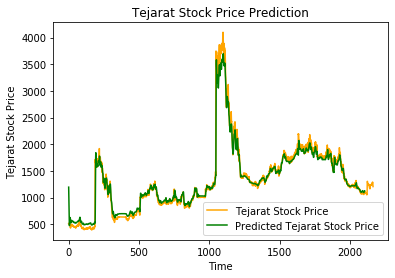

In [126]:
plt.plot(real_stock_price, color = 'orange', label = 'Tejarat Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Tejarat Stock Price')
plt.title('Tejarat Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tejarat Stock Price')
plt.legend()
plt.show()

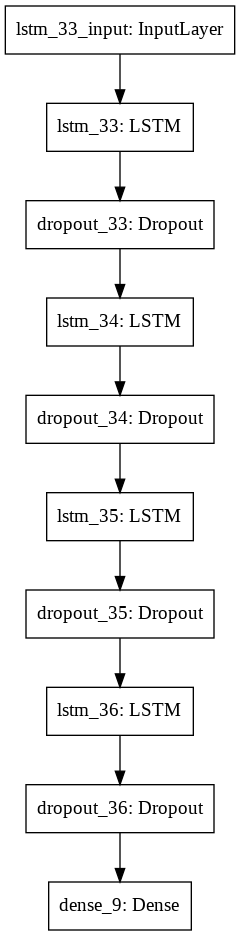

In [128]:
from keras.utils import plot_model
plot_model(regressor,to_file="model.png")

In [0]:
# len(predicted_stock_price)
# len(real_stock_price)
# len(real_stock_price)
# len(inputs)
# len(dataset_test)